**Line Detection with Hough Transforms**

Hough transforms is very useful technique to identify simple shapes like lines and circles in an image. A simple image can be represented by a simple equation with only a few a paramters. Lines need two parameters (slope and intercept); circles need three (x_center, y_center, radius). Hough transform involves identifying the edges first and then finding identifying the targeted shape. In this notebook we will explore how to detect lanes on image of road with Hough transforms.

## Import Libraries

In [106]:
import numpy as np
import cv2 as cv2


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Read Image

We will use an image we created in an excercise earlier.

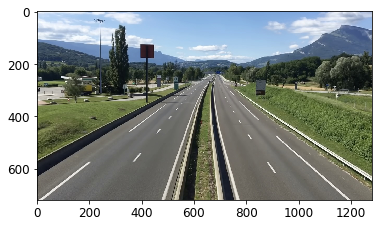

In [107]:
image = cv2.imread('images/filtered_road.jpg')
plt.imshow(fixColor(image))

## Preprocessing the image

We will convert the image to greyscale and run a Gaussian filter to remove small edges

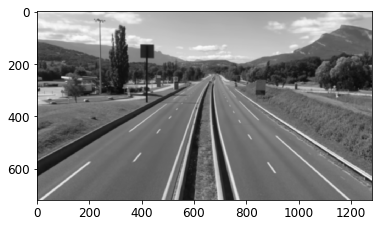

In [108]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(fixColor(gray))

## Create edges with Canny Edge Detector

We will use Canny edge detection to create edges

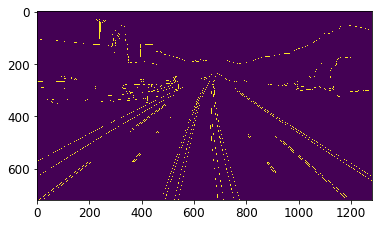

In [109]:
edges = cv2.Canny(gray, 50, 200)
plt.imshow(edges)

## Apply HoughLines

We will apply Hough lines. The parameted used are as follows

1. edges: Output of the edge detector.
2. lines: A vector to store the coordinates of the start and end of the line.
3. rho: The resolution parameter \rho in pixels.
4. theta: The resolution of the parameter \theta in radians.
5. threshold: The minimum number of intersecting points to detect a line.

Hough transforms models lines in its polar coordinate form 
rho = x*cos(theta) + y*sin(theta)

Each pixel on an edge is mapped to lines which are represented theta and rhos. If the distance of an edge point is less maxLineGap, then it is assumed that edge lies on that line. The lines which has edge pixels greater than a minLineLength are finally identified and saved.

In [110]:
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold = 100, minLineLength=5, maxLineGap=250)

In [111]:
for line in lines:
    x1, y1, x2, y2 = line[0]
    if (y1 > 400 or y2 > 400): #Filter out the lines in the top of the image
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 3)


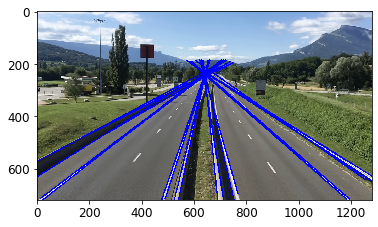

In [112]:
plt.imshow(fixColor(image))